In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y=mnist['data'],mnist['target']

In [6]:
X.shape


(70000, 784)

In [7]:
y.shape


(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit=X[3]
some_digit_image=some_digit.reshape(28,28)


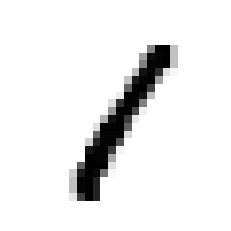

In [10]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [10]:
y=y.astype(np.uint8)

In [11]:
y[0]

5

In [12]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [56]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)


In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.base import BaseEstimator

In [20]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [21]:
never_5_clf=Never5Classifier()

In [22]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
y_train_perfect_pred=y_train_5

In [28]:
confusion_matrix(y_train_5,y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]])

In [29]:
from sklearn.metrics import precision_score,recall_score

In [30]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [34]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
threshold=0

In [36]:
y_some_digit_pred=(y_scores>threshold)

In [37]:
threshold=8000

In [38]:
y_some_digit_pred=(y_scores>threshold)

In [39]:
y_some_digit_pred

array([False])

In [40]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                          method='decision_function')

In [41]:
from sklearn.metrics import precision_recall_curve

In [42]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [43]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.legend()
    plt.xlabel('Threshold')
    

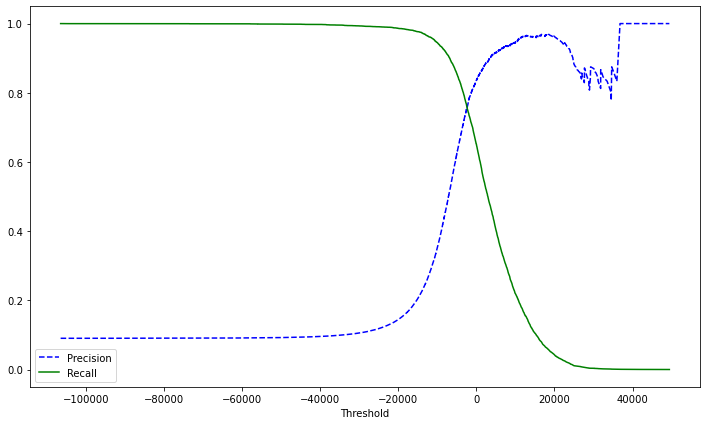

In [44]:
plt.figure(figsize=(12,7))

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [45]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]

In [46]:
threshold_90_precision

3370.0194991439557

In [47]:
y_train_pred_90=(y_scores>=threshold_90_precision)

In [48]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [49]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [59]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')


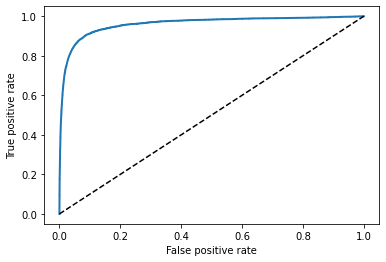

In [60]:
plot_roc_curve(fpr,tpr)
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [63]:
from sklearn.ensemble import RandomForestClassifier


In [66]:
forest_clf=RandomForestClassifier(random_state=42)

In [67]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                 method='predict_proba')

In [69]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

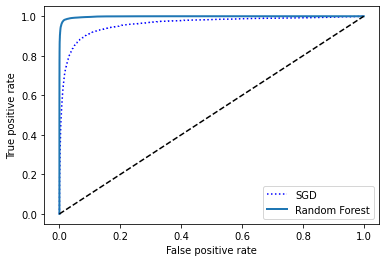

In [72]:
plt.plot(fpr,tpr,'b:',label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [73]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [74]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [76]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [80]:
some_digit_scores=sgd_clf.decision_function([some_digit])

In [81]:
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [82]:
np.argmax(some_digit_scores)

3

In [84]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [85]:
from sklearn.multiclass import OneVsOneClassifier

In [86]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [87]:
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [88]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [89]:
len(ovo_clf.estimators_)

45